Self implemented Neural Network Architecure as baseline

In [1]:
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import warnings
warnings.filterwarnings("ignore")

Class Counter: 7
Class Names: ['CAT', 'COW', 'DEER', 'FOX', 'HORSE', 'SQUIRREL', 'WOLF']
Device: cuda


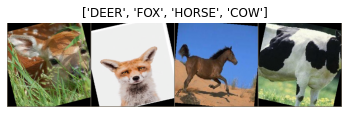

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, visualize_model, losses, accuracy_Scores

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 200

In [4]:
# Define neural network // CNN
class Network(nn.Module): 
    #''' Models a simple Convolutional Neural Network'''

    def __init__(self):
    #''' initialize the network '''
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)      
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(64, 4)
    
    def forward(self, x):        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)        
        return x

In [5]:
model = Network()
print(model)

Network(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=64, out_features=4, bias=True)
)


In [6]:
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, CLASS_COUNTER)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

Epoch 0/199
----------
[TRAIN] Loss: 1.9073 Acc: 0.2320 F1-Score: 0.0397 Precision: 0.0739 Recall: 0.0582
[VALID] Loss: 1.8345 Acc: 0.2650 F1-Score: 0.0400 Precision: 0.0688 Recall: 0.0662

Epoch 1/199
----------
[TRAIN] Loss: 1.8103 Acc: 0.2663 F1-Score: 0.0445 Precision: 0.0733 Recall: 0.0670
[VALID] Loss: 1.8065 Acc: 0.2729 F1-Score: 0.0417 Precision: 0.0695 Recall: 0.0682

Epoch 2/199
----------
[TRAIN] Loss: 1.8038 Acc: 0.2619 F1-Score: 0.0396 Precision: 0.0661 Recall: 0.0657
[VALID] Loss: 1.7876 Acc: 0.2755 F1-Score: 0.0461 Precision: 0.0766 Recall: 0.0689

Epoch 3/199
----------
[TRAIN] Loss: 1.7865 Acc: 0.2750 F1-Score: 0.0462 Precision: 0.0773 Recall: 0.0688
[VALID] Loss: 1.7760 Acc: 0.2835 F1-Score: 0.0515 Precision: 0.0843 Recall: 0.0709

Epoch 4/199
----------
[TRAIN] Loss: 1.7817 Acc: 0.2777 F1-Score: 0.0505 Precision: 0.0861 Recall: 0.0694
[VALID] Loss: 1.7682 Acc: 0.2887 F1-Score: 0.0536 Precision: 0.0896 Recall: 0.0722

Epoch 5/199
----------
[TRAIN] Loss: 1.7798 Acc: 0

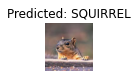

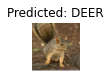

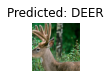

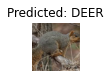

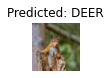

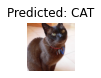

In [7]:
base_model = train_model(model,"baseline", criterion, optimizer, step_lr_scheduler, NUM_EPOCHS)
visualize_model(base_model)
plt.show()

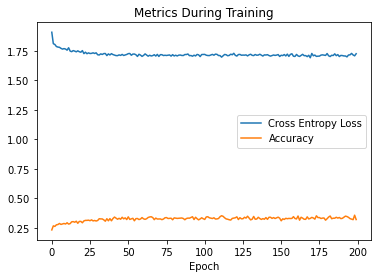

In [8]:
plt.plot(losses, label = "Cross Entropy Loss")
plt.plot(accuracy_Scores, label = "Accuracy")
plt.xlabel('Epoch')
plt.legend()
plt.title('Metrics During Training');

In [9]:
base_model = test_model(base_model, criterion)

[TEST] Loss: 1.7029 Acc: 0.2918 F1-Score: 0.0645 Precision: 0.1188 Recall: 0.0734
Test complete in 0m 6s
